<a href="https://colab.research.google.com/github/LJMfintech/Financial_Data_Analysis/blob/main/DataAnalysisHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install wrds
!pip install numpy_financial

In [30]:
#코드를 작성하는데 필요한 도구들 끌어오기
import wrds
import numpy_financial as npf
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [31]:
#WRDS 연결
conn = wrds.Connection()

Enter your WRDS username [root]:leeskku2025
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


# 1번 문제

In [32]:
#WRDS에 있는 리스트들 확인 -> 리스트를 확인하여 필요한 데이터가 들어있는 항목을 찾아내야됨
lib_list = conn.list_libraries()
print(type(lib_list))
print(lib_list)

<class 'list'>
['aha_sample', 'ahasamp', 'audit', 'audit_audit_comp', 'audit_common', 'auditsmp', 'auditsmp_all', 'bank', 'bank_all', 'bank_premium_samp', 'banksamp', 'block', 'block_all', 'boardex_trial', 'boardsmp', 'bvd_amadeus_trial', 'bvd_bvdbankf_trial', 'bvd_orbis_trial', 'bvdsamp', 'calcbench_trial', 'calcbnch', 'candid_samp', 'cboe', 'cboe_all', 'cboe_sample', 'cboesamp', 'cddsamp', 'ciq', 'ciq_capstrct', 'ciq_common', 'ciqsamp', 'ciqsamp_capstrct', 'ciqsamp_common', 'ciqsamp_keydev', 'ciqsamp_pplintel', 'ciqsamp_ratings', 'ciqsamp_transactions', 'ciqsamp_transcripts', 'cisdmsmp', 'columnar', 'comp', 'comp_execucomp', 'comp_global_daily', 'comp_na_daily_all', 'compsamp', 'compsamp_all', 'compsamp_snapshot', 'contrib', 'contrib_as_filed_financials', 'contrib_ceo_turnover', 'contrib_char_returns', 'contrib_corporate_culture', 'contrib_general', 'contrib_global_factor', 'contrib_intangible_value', 'contrib_kpss', 'contrib_liva', 'crsp', 'crsp_a_indexes', 'crsp_a_stock', 'crsp_a_t

In [33]:
# comp 카테고리를 선택하고 위와 마찬가지로 comp 하위 리스트들을 확인. company의 줄임말이라 대부분 회사의 정보가 여기 있을 것 같다는 추측으로 선택
conn.list_tables(library='comp')

['aco_amda',
 'aco_imda',
 'aco_indfnta',
 'aco_indfntq',
 'aco_indfntytd',
 'aco_indsta',
 'aco_indstq',
 'aco_indstytd',
 'aco_notesa',
 'aco_notesq',
 'aco_notessa',
 'aco_notesytd',
 'aco_pnfnda',
 'aco_pnfndq',
 'aco_pnfndytd',
 'aco_pnfnta',
 'aco_pnfntq',
 'aco_pnfntytd',
 'aco_transa',
 'aco_transq',
 'aco_transsa',
 'aco_transytd',
 'adsprate',
 'asec_amda',
 'asec_imda',
 'asec_notesa',
 'asec_notesq',
 'asec_transa',
 'asec_transq',
 'bank_aacctchg',
 'bank_adesind',
 'bank_afnd1',
 'bank_afnd2',
 'bank_afnddc1',
 'bank_afnddc2',
 'bank_afntind',
 'bank_funda',
 'bank_funda_fncd',
 'bank_fundq',
 'bank_fundq_fncd',
 'bank_iacctchg',
 'bank_idesind',
 'bank_ifndq',
 'bank_ifndytd',
 'bank_ifntq',
 'bank_ifntytd',
 'bank_names',
 'bank_namesq',
 'chars',
 'co_aacctchg',
 'co_aaudit',
 'co_acthist',
 'co_adesind',
 'co_adjfact',
 'co_afnd1',
 'co_afnd2',
 'co_afnddc1',
 'co_afnddc2',
 'co_afntind1',
 'co_afntind2',
 'co_ainvval',
 'co_amkt',
 'co_busdescl',
 'co_cotype',
 'co_f

In [34]:
# comp 하위 리스트중 g_secm에서 이후의 문제들을 해결할 때 필요한 변수들을 가장 많이 포함하고 있다고 생각해 현재는 g_secm 테이블로 데이터 추출 진행중
# g_secm = "Global Sector Company Master" 테이블을 의미합니다. 이 테이블은 각 기업의 국가, 섹터, 산업 등 국가별·섹터별 특성을 정의 (출차: 챗지피)
country = conn.get_table(library='comp', table='g_secm', obs = 5)
country

,gvkey,iid,datadate,conm,ajexm,ajpm,isalrt,cshtrm,curcdm,prccm,...,dvpspm_fn,dvpsxm_fn,epf,exchg,isin,secstat,sedol,tpci,fic,loc
0,000005,01W,2006-01-31,<NA>,1.000,1.000,<NA>,<NA>,USD,10864.860,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,000005,01W,2006-02-28,<NA>,1.000,1.000,<NA>,<NA>,USD,10993.410,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,000005,01W,2006-03-31,<NA>,1.000,1.000,<NA>,<NA>,USD,11109.320,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,000005,01W,2006-04-30,<NA>,1.000,1.000,<NA>,<NA>,USD,11367.140,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,000005,01W,2006-05-31,<NA>,1.000,1.000,<NA>,<NA>,USD,11168.310,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [35]:
# a: 월별 기업 데이터
# b: 기업명 및 국가
# 기업(gvkey) 기준으로 매칭

data_set = conn.raw_sql("""select gvkey, iid, datadate, ajexm, ajpm, cshtrm, prccm, prchm, prclm, dvpspm, dvpsxm, fic, loc

                          from comp.g_secm
                          where fic IN('GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR')
                          and datadate between '2020-03-01' and '2024-12-31'
                          """)
print(data_set.shape)



(1546685, 13)


In [36]:
data_set.head()

,gvkey,iid,datadate,ajexm,ajpm,cshtrm,prccm,prchm,prclm,dvpspm,dvpsxm,fic,loc
0,001932,01W,2020-03-31,1.000,1.000,167128.582,27.590,32.445,23.820,0.000,0.526,GBR,GBR
1,001932,02W,2020-03-31,1.000,1.000,38145.786,598.660,645.170,498.000,0.000,10.789,GBR,GBR
2,001932,03W,2020-03-31,1.000,1.000,57.605,30.980,37.265,25.650,0.000,0.579,GBR,GBR
3,001932,04W,2020-03-31,1.000,1.000,23539.937,27.385,32.530,23.685,0.000,0.526,GBR,GBR
4,001932,07W,2020-03-31,1.000,1.000,<NA>,34.440,34.440,34.440,0.000,0.616,GBR,GBR


데이터 클리닝

In [37]:
# inf, -inf를 NaN으로 변환
data_set = data_set.replace([np.inf, -np.inf], np.nan)

# Drop the rows containing NA
data_set= data_set.dropna(axis=0) # NA값 있는 행 삭제

print(data_set.shape)

(1361150, 13)


In [38]:
# Fill na with 0
#dataset.fillna('0')
data_set.head()

,gvkey,iid,datadate,ajexm,ajpm,cshtrm,prccm,prchm,prclm,dvpspm,dvpsxm,fic,loc
0,001932,01W,2020-03-31,1.000,1.000,167128.582,27.590,32.445,23.820,0.000,0.526,GBR,GBR
1,001932,02W,2020-03-31,1.000,1.000,38145.786,598.660,645.170,498.000,0.000,10.789,GBR,GBR
2,001932,03W,2020-03-31,1.000,1.000,57.605,30.980,37.265,25.650,0.000,0.579,GBR,GBR
3,001932,04W,2020-03-31,1.000,1.000,23539.937,27.385,32.530,23.685,0.000,0.526,GBR,GBR
5,002410,01W,2020-03-31,1.000,1.000,2421381.880,3.442,4.226,2.337,0.082,0.000,GBR,GBR


In [39]:
print('Null Values =', data_set.isnull().values.any())

Null Values = False


In [40]:
# fic 값이 'gbr'인 행만 선택
data_set_gbr = data_set[ (data_set['fic'] == 'GBR')]

# CSV 파일로 저장
data_set_gbr.to_csv('data_set_gbr.csv', index=False)

데이터 변환

# 2번 문제

In [41]:
#챗지피티 버전
# -----------------------------
# 1. 조정계수 처리
# -----------------------------
# ajexm 처리
if 'ajexm' in data_set.columns:
    data_set['ajexm'] = data_set['ajexm'].replace(0, np.nan)
    if data_set['ajexm'].isna().any():
      data_set['ajexm'] = data_set['ajexm'].fillna(1)
else:
    data_set['ajexm'] = 1

# ajpm 처리
if 'ajpm' in data_set.columns:
    data_set['ajpm'] = data_set['ajpm'].replace(0, np.nan).fillna(1)
else:
    data_set['ajpm'] = 1

# -----------------------------
# 2. 날짜 처리 및 정렬
# -----------------------------
data_set['datadate'] = pd.to_datetime(data_set['datadate'], errors='coerce')
invalid_dates = data_set['datadate'].isna().sum()
data_set = data_set.dropna(subset=['datadate'])  # 날짜 NaT 제거
data_set = data_set.sort_values(['gvkey', 'datadate'])

# -----------------------------
# 3. 조정주가 및 수익률 계산
# -----------------------------
data_set['prccm_adj'] = data_set['prccm'] * (data_set['ajpm'] / data_set['ajexm'])
data_set['prccm_adj_prev'] = data_set.groupby('gvkey')['prccm_adj'].shift(1)
data_set['ret'] = data_set['prccm_adj'] / data_set['prccm_adj_prev'] - 1

# 수익률 이상치 필터 (절대값 1.5 초과 시 제거)
data_set.loc[data_set['ret'].abs() > 1.5, 'ret'] = np.nan

# -----------------------------
# 4. 시가총액 계산
# -----------------------------
if 'cshtrm' in data_set.columns:
    data_set['mktcap'] = data_set['prccm_adj'] * data_set['cshtrm']
else:
    data_set['mktcap'] = np.nan

# -----------------------------
# 5. 결측 및 이상치 처리
# -----------------------------
data_set = data_set.replace([np.inf, -np.inf], np.nan)
data_set = data_set.dropna(subset=['ret', 'mktcap', 'datadate'])

# -----------------------------
# 6. 동등가중 수익률 계산
# -----------------------------
# ret 유효값이 2개 이상인 그룹만 계산
def calc_ew_avg(x):
    valid_ret = x['ret'].dropna()
    if len(valid_ret) >= 2:
        return valid_ret.mean()
    else:
        return np.nan

ew_ret = data_set.groupby(['fic', 'datadate']).apply(calc_ew_avg).reset_index(name='ew_ret')
ew_ret = ew_ret.dropna(subset=['ew_ret'])

# -----------------------------
# 7. 시가총액가중 수익률 계산
# -----------------------------
def calc_vw_avg(x):
    valid = (x['mktcap'] > 0) & x['ret'].notna()
    if valid.any():
        return np.average(x.loc[valid, 'ret'], weights=x.loc[valid, 'mktcap'])
    else:
        return np.nan

vw_ret = data_set.groupby(['fic', 'datadate']).apply(calc_vw_avg).reset_index(name='vw_ret')
vw_ret = vw_ret.dropna(subset=['vw_ret'])

# -----------------------------
# 8. 최종 정렬 및 확인
# -----------------------------
ew_ret = ew_ret.sort_values('datadate').reset_index(drop=True)
vw_ret = vw_ret.sort_values('datadate').reset_index(drop=True)

print("동등가중 수익률 샘플:")
print(ew_ret.head())

print("시가총액가중 수익률 샘플:")
print(vw_ret.head())

/tmp/ipython-input-395953804.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ew_ret = data_set.groupby(['fic', 'datadate']).apply(calc_ew_avg).reset_index(name='ew_ret')


동등가중 수익률 샘플:
   fic   datadate ew_ret
0  AUS 2020-03-31 -0.372
1  CHN 2020-03-31 -0.001
2  DEU 2020-03-31 -0.027
3  FRA 2020-03-31 -0.024
4  GBR 2020-03-31 -0.002
시가총액가중 수익률 샘플:
   fic   datadate  vw_ret
0  AUS 2020-03-31  -0.745
1  CHN 2020-03-31   0.029
2  DEU 2020-03-31  -0.195
3  FRA 2020-03-31   0.003
4  ZAF 2020-03-31  -0.390


/tmp/ipython-input-395953804.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_ret = data_set.groupby(['fic', 'datadate']).apply(calc_vw_avg).reset_index(name='vw_ret')


In [42]:
ew_ret.groupby('fic')['ew_ret'].median()

,ew_ret
fic,
AUS,0.010
BRA,-0.026
CHN,-0.005
DEU,-0.022
FRA,-0.010
GBR,-0.015
IND,0.037
JPN,-0.005
TUR,0.029


/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning

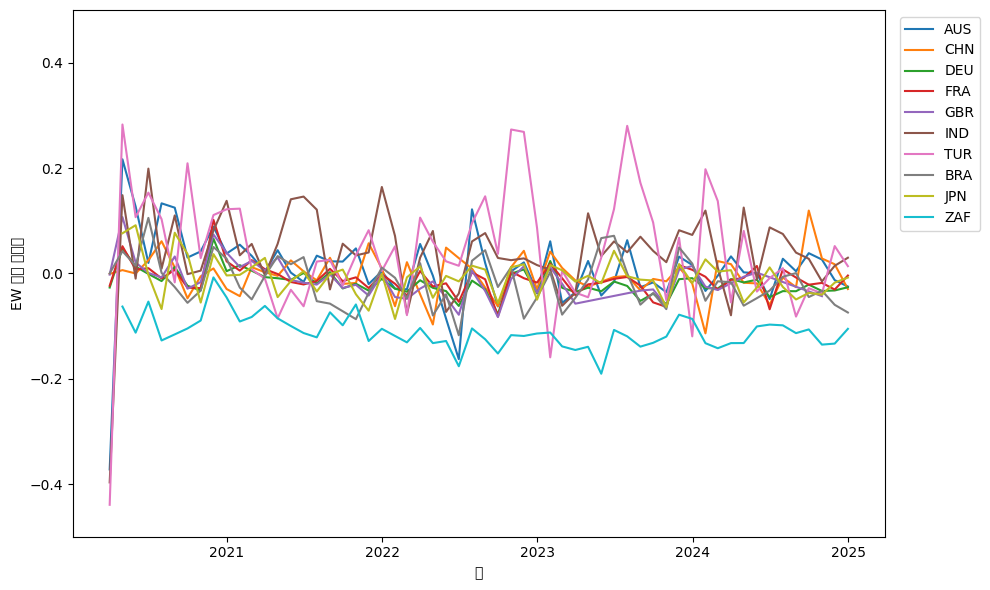

In [43]:
# datadate가 날짜형이면 변환, 아니면 생략
ew_ret['datadate'] = pd.to_datetime(ew_ret['datadate'], errors='coerce')

# 0.5 이상/이하 극단값 제외한 데이터만 선택
plot_data = ew_ret[ew_ret['ew_ret'].abs() < 0.5]

plt.figure(figsize=(10,6))
for fic in plot_data['fic'].unique():
    temp = plot_data[plot_data['fic'] == fic]
    plt.plot(temp['datadate'], temp['ew_ret'], label=fic)
plt.ylim(-0.5, 0.5)           # y축 제한 필요하면 조정(극단값이 이미 제거되어 -0.2~0.2로 주로 사용)
plt.ylabel("EW 월별 수익률")
plt.xlabel("월")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()



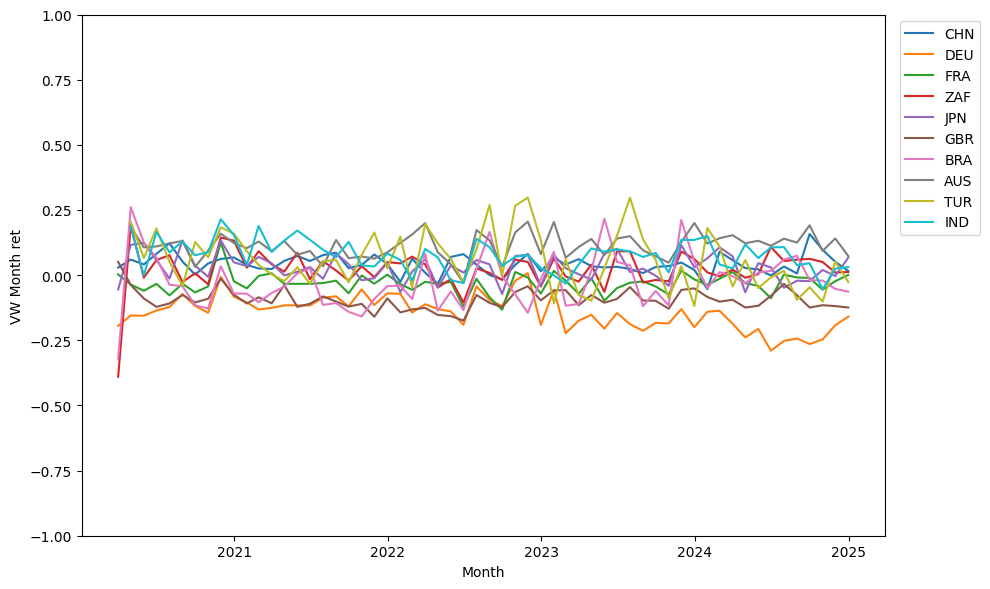

In [44]:
# datadate가 날짜형이면 변환
vw_ret['datadate'] = pd.to_datetime(vw_ret['datadate'], errors='coerce')

# 극단치 제거: VW 수익률이 -0.2~0.2 범위만 사용
plot_data = vw_ret[vw_ret['vw_ret'].abs() < 0.5]

plt.figure(figsize=(10,6))
for fic in plot_data['fic'].unique():
    temp = plot_data[plot_data['fic'] == fic]
    plt.plot(temp['datadate'], temp['vw_ret'], label=fic)
plt.ylim(-1, 1)           # y축 제한 필요하면 조정(극단값이 이미 제거되어 -0.2~0.2로 주로 사용)
plt.ylabel("VW Month ret")
plt.xlabel("Month")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()

# 3번 문제

In [45]:
# 새 컬럼 period 생성 함수
def classify_period(date):
    if pd.Timestamp('2020-03-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'COVID-19 Crisis Period'
    elif pd.Timestamp('2022-01-01') <= date <= pd.Timestamp('2024-12-31'):
        return 'Post-crisis Recovery Period'
    else:
        return 'Other'

#  period 컬럼 생성
data_set['period'] = data_set['datadate'].apply(classify_period)

ew_ret['period'] = ew_ret['datadate'].apply(classify_period)
vw_ret['period'] = vw_ret['datadate'].apply(classify_period)

# 결과 예시
print(ew_ret.head())
print(vw_ret.head())

   fic   datadate ew_ret                  period
0  AUS 2020-03-31 -0.372  COVID-19 Crisis Period
1  CHN 2020-03-31 -0.001  COVID-19 Crisis Period
2  DEU 2020-03-31 -0.027  COVID-19 Crisis Period
3  FRA 2020-03-31 -0.024  COVID-19 Crisis Period
4  GBR 2020-03-31 -0.002  COVID-19 Crisis Period
   fic   datadate  vw_ret                  period
0  AUS 2020-03-31  -0.745  COVID-19 Crisis Period
1  CHN 2020-03-31   0.029  COVID-19 Crisis Period
2  DEU 2020-03-31  -0.195  COVID-19 Crisis Period
3  FRA 2020-03-31   0.003  COVID-19 Crisis Period
4  ZAF 2020-03-31  -0.390  COVID-19 Crisis Period


In [46]:
# CSV 파일로 저장
ew_ret.reset_index().to_csv('ew_ret.csv', index=False)
vw_ret.reset_index().to_csv('vw_ret.csv', index=False)

# 4번 문제

In [55]:
from scipy.stats import skew, kurtosis


# summary statistics 함수 정의
def calc_summary_stats(x):
    return pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'autocorr': x.autocorr(lag=1),
        'skewness': skew(x.dropna()),
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True)
    })



# [여기서부터 추가]
ew_ret['ew_ret'] = pd.to_numeric(ew_ret['ew_ret'], errors='coerce')
vw_ret['vw_ret'] = pd.to_numeric(vw_ret['vw_ret'], errors='coerce')

# 국가별, 기간별 그룹 요약통계 산출
ew_stats = ew_ret.groupby(['fic', 'period'])['ew_ret'].apply(calc_summary_stats)
vw_stats = vw_ret.groupby(['fic', 'period'])['vw_ret'].apply(calc_summary_stats)


# 결과 출력
print(ew_stats)
print(vw_stats)



fic  period                                      
AUS  COVID-19 Crisis Period       mean               0.031
                                  median             0.033
                                  std                0.106
                                  min               -0.372
                                  max                0.217
                                                     ...  
ZAF  Post-crisis Recovery Period  min               -0.191
                                  max               -0.078
                                  autocorr           0.151
                                  skewness          -0.674
                                  excess_kurtosis    1.220
Name: ew_ret, Length: 160, dtype: float64
fic  period                                      
AUS  COVID-19 Crisis Period       mean               0.064
                                  median             0.099
                                  std                0.184
                                

In [56]:
# CSV 파일로 저장
ew_stats.reset_index().to_csv('ew_stats.csv', index=False)
vw_stats.reset_index().to_csv('vw_stats.csv', index=False)

# 5번 문제

In [60]:
# summary statistics 함수 정의
def calc_summary_stats(x):
    return pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'autocorr': x.autocorr(lag=1),
        'skewness': skew(x.dropna()),
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True)
    })

# 국가 그룹 분류 컬럼 추가 ("developed"/"emerging")
developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

ew_ret['group'] = ew_ret['fic'].apply(lambda x: 'developed' if x in developed else ('emerging' if x in emerging else 'other'))
vw_ret['group'] = vw_ret['fic'].apply(lambda x: 'developed' if x in developed else ('emerging' if x in emerging else 'other'))

# 숫자형 변환
ew_ret['ew_ret'] = pd.to_numeric(ew_ret['ew_ret'], errors='coerce')
vw_ret['vw_ret'] = pd.to_numeric(vw_ret['vw_ret'], errors='coerce')

# 국가그룹, 기간별 요약통계 산출
ew_stats_group = ew_ret.groupby(['group', 'period'])['ew_ret'].apply(calc_summary_stats).reset_index()
vw_stats_group = vw_ret.groupby(['group', 'period'])['vw_ret'].apply(calc_summary_stats).reset_index()

# 결과 출력
print(ew_stats_group)
print(vw_stats_group)

        group                       period          level_2  ew_ret
0   developed       COVID-19 Crisis Period             mean  -0.001
1   developed       COVID-19 Crisis Period           median   0.001
2   developed       COVID-19 Crisis Period              std   0.106
3   developed       COVID-19 Crisis Period              min  -0.927
4   developed       COVID-19 Crisis Period              max   0.217
5   developed       COVID-19 Crisis Period         autocorr   0.032
6   developed       COVID-19 Crisis Period         skewness  -6.431
7   developed       COVID-19 Crisis Period  excess_kurtosis  53.309
8   developed  Post-crisis Recovery Period             mean  -0.018
9   developed  Post-crisis Recovery Period           median  -0.018
10  developed  Post-crisis Recovery Period              std   0.032
11  developed  Post-crisis Recovery Period              min  -0.163
12  developed  Post-crisis Recovery Period              max   0.122
13  developed  Post-crisis Recovery Period      

In [59]:
# CSV 파일로 저장
ew_stats_group.reset_index().to_csv('ew_stats_group.csv', index=False)
vw_stats_group.reset_index().to_csv('vw_stats_group.csv', index=False)

# 6번 문제

In [61]:
# --- ew_ret 기준 ---

# 코로나 시기
ew_ret_covid = ew_ret[ew_ret['period'] == 'COVID-19 Crisis Period']
pivot_covid_ew = ew_ret_covid.pivot(index='datadate', columns='fic', values='ew_ret')
corr_covid_ew = pivot_covid_ew.corr()

# 회복기 시기
ew_ret_recovery = ew_ret[ew_ret['period'] == 'Post-crisis Recovery Period']
pivot_recovery_ew = ew_ret_recovery.pivot(index='datadate', columns='fic', values='ew_ret')
corr_recovery_ew = pivot_recovery_ew.corr()

print("COVID-19 Crisis Period ew_ret 상관계수 행렬")
print(corr_covid_ew)
print("\nPost-crisis Recovery Period ew_ret 상관계수 행렬")
print(corr_recovery_ew)

# --- vw_ret 기준 ---

# 코로나 시기
vw_ret_covid = vw_ret[vw_ret['period'] == 'COVID-19 Crisis Period']
pivot_covid_vw = vw_ret_covid.pivot(index='datadate', columns='fic', values='vw_ret')
corr_covid_vw = pivot_covid_vw.corr()

# 회복기 시기
vw_ret_recovery = vw_ret[vw_ret['period'] == 'Post-crisis Recovery Period']
pivot_recovery_vw = vw_ret_recovery.pivot(index='datadate', columns='fic', values='vw_ret')
corr_recovery_vw = pivot_recovery_vw.corr()

print("COVID-19 Crisis Period vw_ret 상관계수 행렬")
print(corr_covid_vw)
print("\nPost-crisis Recovery Period vw_ret 상관계수 행렬")
print(corr_recovery_vw)

COVID-19 Crisis Period ew_ret 상관계수 행렬
fic   AUS   BRA    CHN    DEU   FRA    GBR   IND    JPN    TUR    ZAF
fic                                                                  
AUS 1.000 0.071  0.054  0.488 0.420  0.425 0.699  0.883  0.831  0.821
BRA 0.071 1.000  0.250  0.485 0.423  0.509 0.292  0.009  0.120  0.077
CHN 0.054 0.250  1.000 -0.004 0.030 -0.044 0.057 -0.026 -0.047 -0.032
DEU 0.488 0.485 -0.004  1.000 0.922  0.878 0.309  0.345  0.411  0.383
FRA 0.420 0.423  0.030  0.922 1.000  0.852 0.266  0.295  0.373  0.419
GBR 0.425 0.509 -0.044  0.878 0.852  1.000 0.192  0.180  0.297  0.233
IND 0.699 0.292  0.057  0.309 0.266  0.192 1.000  0.827  0.650  0.817
JPN 0.883 0.009 -0.026  0.345 0.295  0.180 0.827  1.000  0.789  0.941
TUR 0.831 0.120 -0.047  0.411 0.373  0.297 0.650  0.789  1.000  0.779
ZAF 0.821 0.077 -0.032  0.383 0.419  0.233 0.817  0.941  0.779  1.000

Post-crisis Recovery Period ew_ret 상관계수 행렬
fic   AUS    BRA    CHN   DEU   FRA   GBR    IND    JPN    TUR    ZAF
fic     

In [63]:
# 기준 리스트
developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

def get_group_corrmat(ret_df, value_col, group_list, period_name):
    subset = ret_df[(ret_df['fic'].isin(group_list)) & (ret_df['period'] == period_name)]
    pivot = subset.pivot(index='datadate', columns='fic', values=value_col)
    return pivot.corr()

def get_corr_level(corrmat):
    # 상관계수 행렬에서 대각선 제외하고 평균
    m = corrmat.values
    mask = ~np.eye(m.shape[0], dtype=bool)
    return np.nanmean(m[mask])

# 그룹, 시기별 상관계수 행렬 및 평균값 구하기
results = []
for group_name, group_list in zip(['developed', 'emerging'], [developed, emerging]):
    for period in ['COVID-19 Crisis Period', 'Post-crisis Recovery Period']:
        # ew_ret
        corrmat_ew = get_group_corrmat(ew_ret, 'ew_ret', group_list, period)
        mean_corr_ew = get_corr_level(corrmat_ew)
        results.append({'type':'ew_ret', 'group':group_name, 'period':period, 'mean_corr':mean_corr_ew})
        # vw_ret
        corrmat_vw = get_group_corrmat(vw_ret, 'vw_ret', group_list, period)
        mean_corr_vw = get_corr_level(corrmat_vw)
        results.append({'type':'vw_ret', 'group':group_name, 'period':period, 'mean_corr':mean_corr_vw})

import pandas as pd
results_df = pd.DataFrame(results)

# 결과 출력(표 형태)
print(results_df)

     type      group                       period  mean_corr
0  ew_ret  developed       COVID-19 Crisis Period      0.569
1  vw_ret  developed       COVID-19 Crisis Period      0.181
2  ew_ret  developed  Post-crisis Recovery Period      0.592
3  vw_ret  developed  Post-crisis Recovery Period      0.266
4  ew_ret   emerging       COVID-19 Crisis Period      0.296
5  vw_ret   emerging       COVID-19 Crisis Period      0.565
6  ew_ret   emerging  Post-crisis Recovery Period      0.048
7  vw_ret   emerging  Post-crisis Recovery Period      0.074


# 7번 문제

In [67]:
from scipy.stats import skew, kurtosis
import pandas as pd

def calc_summary_stats(x):
    return pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'autocorr': x.autocorr(lag=1),
        'skewness': skew(x.dropna()),
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True)
    })

developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging  = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']
ew_ret['group'] = ew_ret['fic'].apply(lambda x: 'developed' if x in developed else ('emerging' if x in emerging else 'other'))
vw_ret['group'] = vw_ret['fic'].apply(lambda x: 'developed' if x in developed else ('emerging' if x in emerging else 'other'))

# 1. 국가별 통계
stats_by_country_ew = ew_ret.groupby(['fic'])['ew_ret'].apply(calc_summary_stats).reset_index()
stats_by_country_vw = vw_ret.groupby(['fic'])['vw_ret'].apply(calc_summary_stats).reset_index()

# 2. 기간별 통계
stats_by_period_ew = ew_ret.groupby(['period'])['ew_ret'].apply(calc_summary_stats).reset_index()
stats_by_period_vw = vw_ret.groupby(['period'])['vw_ret'].apply(calc_summary_stats).reset_index()

# 3. 그룹별 통계
stats_by_group_ew = ew_ret.groupby(['group'])['ew_ret'].apply(calc_summary_stats).reset_index()
stats_by_group_vw = vw_ret.groupby(['group'])['vw_ret'].apply(calc_summary_stats).reset_index()

# 예시 출력
print(stats_by_country_ew)
print(stats_by_period_ew)
print(stats_by_group_ew)

    fic          level_1  ew_ret
0   AUS             mean   0.008
1   AUS           median   0.010
2   AUS              std   0.077
3   AUS              min  -0.372
4   AUS              max   0.217
..  ...              ...     ...
75  ZAF              min  -0.515
76  ZAF              max  -0.008
77  ZAF         autocorr   0.019
78  ZAF         skewness  -4.644
79  ZAF  excess_kurtosis  28.726

[80 rows x 3 columns]
                         period          level_1  ew_ret
0        COVID-19 Crisis Period             mean  -0.003
1        COVID-19 Crisis Period           median   0.001
2        COVID-19 Crisis Period              std   0.107
3        COVID-19 Crisis Period              min  -0.927
4        COVID-19 Crisis Period              max   0.283
5        COVID-19 Crisis Period         autocorr   0.335
6        COVID-19 Crisis Period         skewness  -3.871
7        COVID-19 Crisis Period  excess_kurtosis  28.448
8   Post-crisis Recovery Period             mean  -0.017
9   Post-cr

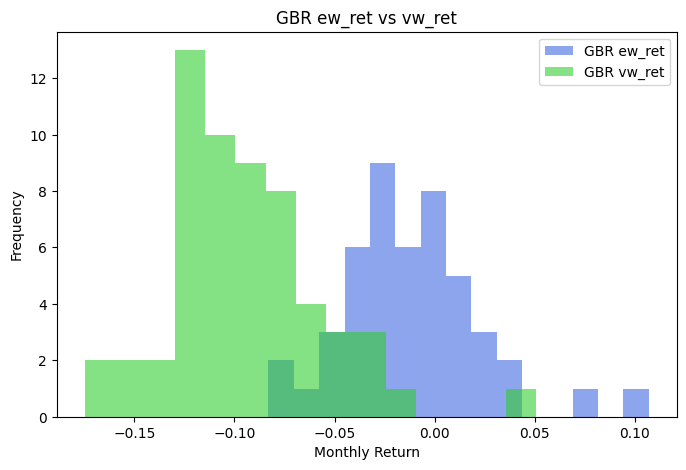

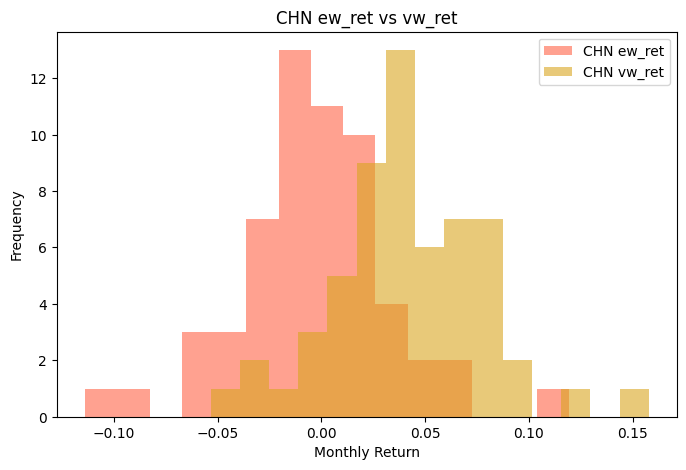

In [68]:
def plot_histogram_compare(df1, col1, df2, col2, country_code, color1, color2):
    plt.figure(figsize=(8, 5))
    plt.hist(df1[df1['fic']==country_code][col1].dropna(), bins=15, color=color1, alpha=0.6, label=f'{country_code} {col1}')
    plt.hist(df2[df2['fic']==country_code][col2].dropna(), bins=15, color=color2, alpha=0.6, label=f'{country_code} {col2}')
    plt.title(f'{country_code} ew_ret vs vw_ret')
    plt.xlabel('Monthly Return')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_histogram_compare(ew_ret, 'ew_ret', vw_ret, 'vw_ret', 'GBR', 'royalblue', 'limegreen')
plot_histogram_compare(ew_ret, 'ew_ret', vw_ret, 'vw_ret', 'CHN',  'tomato',    'goldenrod')

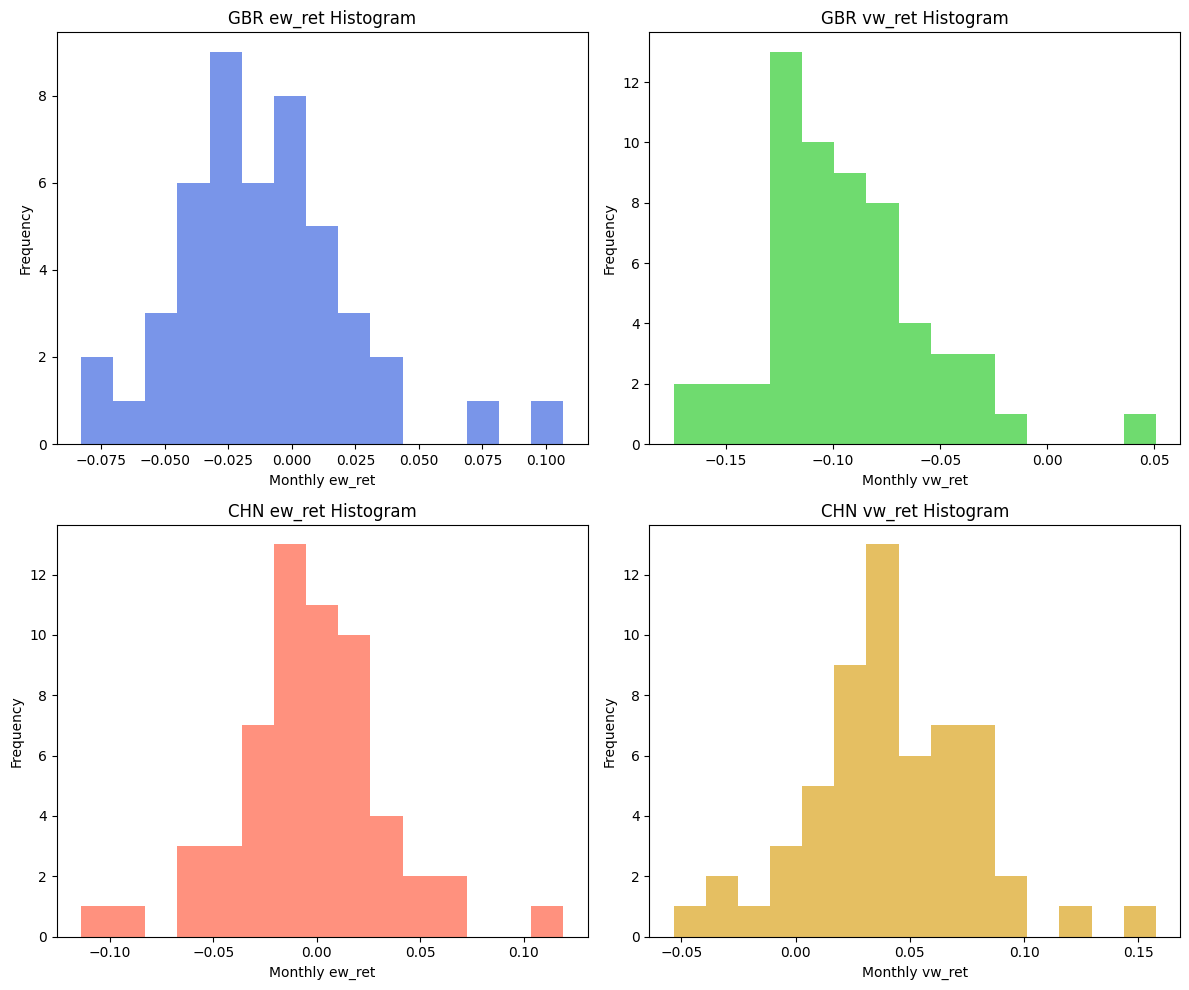

In [69]:
# (b) GBR, CHN의 ew_ret/vw_ret 히스토그램 4구역 출력
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0,0].hist(ew_ret[ew_ret['fic']=='GBR']['ew_ret'].dropna(), bins=15, color='royalblue', alpha=0.7)
axs[0,0].set_title('GBR ew_ret Histogram')
axs[0,0].set_xlabel('Monthly ew_ret')
axs[0,0].set_ylabel('Frequency')

axs[0,1].hist(vw_ret[vw_ret['fic']=='GBR']['vw_ret'].dropna(), bins=15, color='limegreen', alpha=0.7)
axs[0,1].set_title('GBR vw_ret Histogram')
axs[0,1].set_xlabel('Monthly vw_ret')
axs[0,1].set_ylabel('Frequency')

axs[1,0].hist(ew_ret[ew_ret['fic']=='CHN']['ew_ret'].dropna(), bins=15, color='tomato', alpha=0.7)
axs[1,0].set_title('CHN ew_ret Histogram')
axs[1,0].set_xlabel('Monthly ew_ret')
axs[1,0].set_ylabel('Frequency')

axs[1,1].hist(vw_ret[vw_ret['fic']=='CHN']['vw_ret'].dropna(), bins=15, color='goldenrod', alpha=0.7)
axs[1,1].set_title('CHN vw_ret Histogram')
axs[1,1].set_xlabel('Monthly vw_ret')
axs[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()